In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
import datetime

In [2]:
df_clients = pd.read_csv('data/data/clients.csv')
# df_train = pd.read_csv('data/data/uplift_train.csv')
# df_test = pd.read_csv('data/data/uplift_test.csv')
df_purchases = pd.read_csv('data/data/purchases.csv')
df_purchases.shape

(45786568, 13)

In [12]:
df_purchases['transaction_datetime'] = pd.to_datetime(df_purchases['transaction_datetime'])
df_purchases['transaction_date'] = pd.to_datetime(df_purchases['transaction_datetime']).dt.date

In [13]:
df_purchases_test = df_purchases[['client_id','transaction_id','transaction_datetime','purchase_sum', 'transaction_date']].drop_duplicates()

# Проведем тест с суммой покупок


In [23]:
df_purchases_test.sort_values('transaction_date')

,groups_,client_id,transaction_id,transaction_datetime,purchase_sum,transaction_date
17008489,A,5f954310ac,7cce14768d,2018-11-21 22:25:04,406.00,2018-11-21
7313158,A,2939ea1218,776a9701c3,2018-11-21 21:22:35,290.00,2018-11-21
34224093,B,bfdd1eb345,31dbff2aa9,2018-11-21 21:12:41,99.00,2018-11-21
36244633,B,cafbd06177,a777e37dde,2018-11-21 21:42:07,150.49,2018-11-21
45254358,A,fd00d8a5f3,a8deaed273,2018-11-21 21:54:45,525.92,2018-11-21
...,...,...,...,...,...,...
17825311,A,64351ccb57,e71844a385,2019-03-18 15:48:26,82.28,2019-03-18
17824446,A,64335f60f1,b152bd99b6,2019-03-18 06:55:24,106.00,2019-03-18
36965671,A,cf1653871d,45835ed5f8,2019-03-18 10:40:41,54.00,2019-03-18
36966307,A,cf16da68ba,e39c525897,2019-03-18 13:34:41,526.41,2019-03-18


In [15]:
df_purchases_test.shape
df_purchases_test = df_purchases_test[df_purchases_test['purchase_sum'] > 0]
df_purchases_test.shape

(8044662, 5)

In [16]:
## 1. Split по юзерам

users = df_purchases_test['client_id'].unique()
rng = np.random.default_rng()
usr_hits = np.where(rng.random(len(users)) < 0.5, 'A', 'B')
df_ = pd.DataFrame(data=usr_hits, index=users, columns = ['groups_'])
df_purchases_test = df_.merge(df_purchases_test, left_index=True, right_on = 'client_id')

In [17]:
df_purchases_test[['groups_','client_id']]['groups_'].value_counts(normalize=True)

groups_
B    0.500629
A    0.499371
Name: proportion, dtype: float64

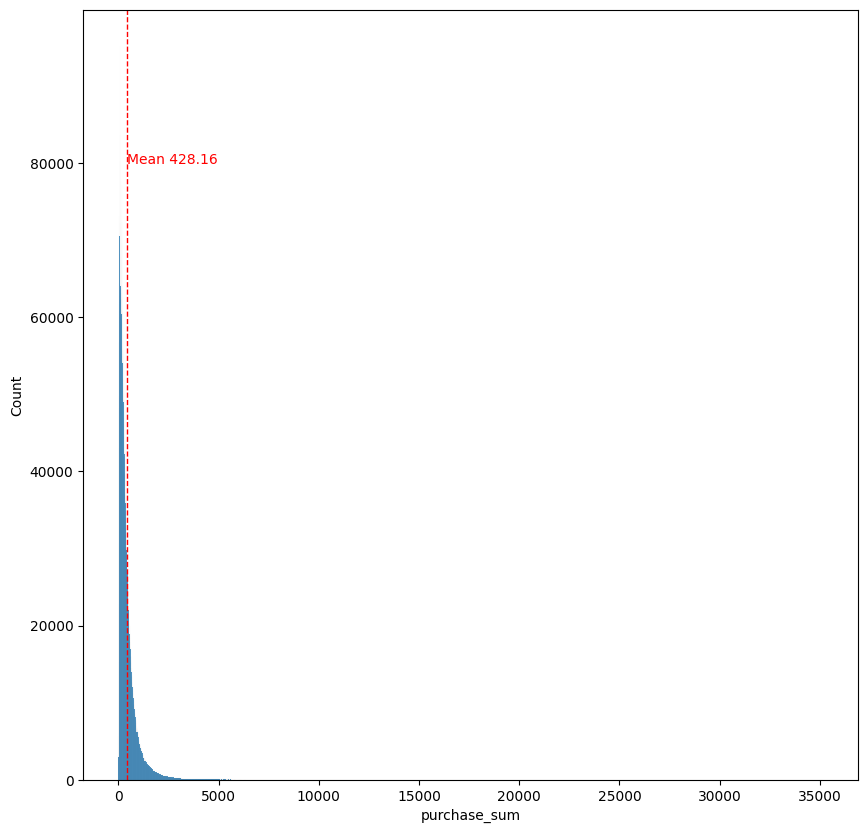

In [18]:
fig, axes = plt.subplots(1, figsize=(10,10))
sns.histplot(ax=axes, x = df_purchases_test['purchase_sum'])
mean_values = np.mean(df_purchases_test['purchase_sum'])
axes.axvline(mean_values, color='red', linestyle='--', linewidth=1)
axes.text(x = mean_values, y = 80000, s = "Mean {:.2f}".format(mean_values), color = 'red', rotation = 'horizontal')
plt.show()

In [ ]:
df_purchases_test.sort_values(['transaction_date'])

In [36]:
df_gr = df_purchases_test.groupby('transaction_date', as_index=False).agg(cnt_m = ('transaction_id', 'count'))
df_gr['cum_sum'] = df_gr['cnt_m'].cumsum()#[df_gr['cnt_m']df_gr['cnt_m'].sum()/2
df_gr[df_gr['cum_sum'] <= df_gr['cnt_m'].sum()*0.3]

,transaction_date,cnt_m,cum_sum
0,2018-11-21,32,32
1,2018-11-22,61181,61213
2,2018-11-23,65383,126596
3,2018-11-24,60016,186612
4,2018-11-25,55527,242139
5,2018-11-26,63380,305519
6,2018-11-27,60717,366236
7,2018-11-28,60787,427023
8,2018-11-29,61216,488239
9,2018-11-30,65049,553288


In [42]:
df_purchases_test_old = df_purchases_test[df_purchases_test['transaction_date'] <= datetime.date(2018,12,29)]
df_purchases_test_new = df_purchases_test[(df_purchases_test['transaction_date'] > datetime.date(2018,12,29)]

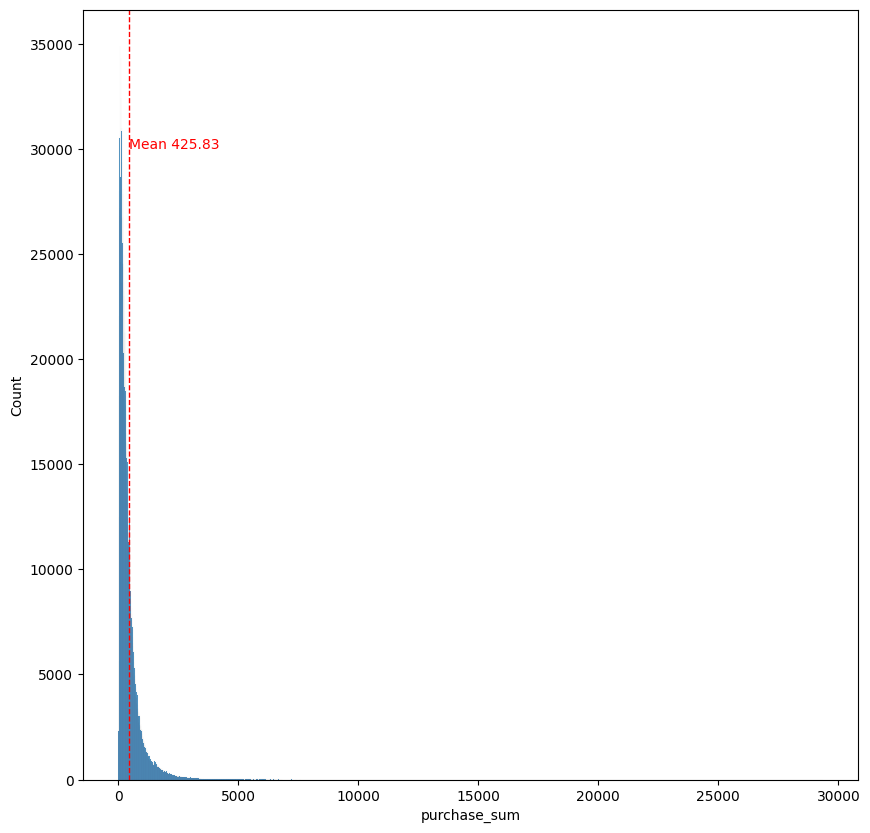

In [45]:
fig, axes = plt.subplots(1, figsize=(10,10))
sns.histplot(ax=axes, x = df_purchases_test_old['purchase_sum'])
mean_values = np.mean(df_purchases_test_old['purchase_sum'])
axes.axvline(mean_values, color='red', linestyle='--', linewidth=1)
axes.text(x = mean_values, y = 30000, s = "Mean {:.2f}".format(mean_values), color = 'red', rotation = 'horizontal')
plt.show()

## Гипотеза
mde = +-3%
<br>alpha = 0.05
<br>power = 0.8


## Проверим на АА тесте
-бутстрап
<br>-линейка и т-тест

In [47]:
df_purchases_test_old.head(5)

,groups_,client_id,transaction_id,transaction_datetime,purchase_sum,transaction_date,RN,old_new
0,A,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,2018-12-01,1,old
19,A,000012768d,c1ca85d462,2018-12-16 08:56:01,574.0,2018-12-16,2,old
52,B,000036f903,12b218b054,2018-11-28 10:48:36,241.0,2018-11-28,5,old
57,B,000036f903,e90f8f4e1f,2018-12-03 10:24:30,458.0,2018-12-03,6,old
63,B,000036f903,462ba5a47d,2018-12-06 10:42:27,328.0,2018-12-06,7,old


In [48]:
df_purchases_test_old.groupby(['groups_'], as_index=False).agg(metric_ = ('purchase_sum',np.mean),
                                                               std_metric_ = ('purchase_sum',np.std),
                                                               cnt_trans = ('transaction_id',pd.Series.nunique),
                                                               cnt_client = ('client_id',pd.Series.nunique)
                                                              )

C:\Users\home\AppData\Local\Temp\ipykernel_3500\3676388540.py:1: FutureWarning: The provided callable <function mean at 0x000002C7728BADE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_purchases_test_old.groupby(['groups_'], as_index=False).agg(metric_ = ('purchase_sum',np.mean),
C:\Users\home\AppData\Local\Temp\ipykernel_3500\3676388540.py:1: FutureWarning: The provided callable <function std at 0x000002C7728BAF20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_purchases_test_old.groupby(['groups_'], as_index=False).agg(metric_ = ('purchase_sum',np.mean),


,groups_,metric_,std_metric_,cnt_trans,cnt_client
0,A,426.018495,511.352893,1182216,166728
1,B,425.635833,512.081112,1182813,166521


In [143]:
## Линеаризация
def linear_func(data_lin):
    fixed_data = data_lin.groupby(['groups_','client_id'], as_index=False).agg(
                                                        numerator = ('purchase_sum','sum'),
                                                        denominator = ('transaction_id','count')
                                                    )
    avg_control = (fixed_data[fixed_data['groups_'] == 'A']['numerator'].sum()/
                   fixed_data[fixed_data['groups_'] == 'A']['denominator'].sum()
                  )
    avg_denom = fixed_data[fixed_data['groups_'] == 'A']['denominator'].mean()
    fixed_data['numerator_lin'] =  fixed_data['numerator'] - avg_control*fixed_data['denominator']
    fixed_data['metric'] =  fixed_data['numerator_lin']/avg_denom + avg_control
    return fixed_data

In [144]:
s_pre = linear_func(df_purchases_test_old)
s_pre

,groups_,client_id,numerator,denominator,numerator_lin,metric
0,A,000012768d,1581.00,2,728.963010,528.824109
1,A,000048b7a6,445.00,1,18.981505,428.695456
2,A,000073194a,1224.16,4,-479.913980,358.336252
3,A,00007c7133,3608.00,6,1051.889030,574.366348
4,A,00007f9014,2945.99,10,-1314.194949,240.677652
...,...,...,...,...,...,...
333244,B,fffe0abb97,975.82,3,-302.235485,383.394241
333245,B,fffea1204c,800.93,4,-903.143980,298.648148
333246,B,fffeacbe3e,1474.93,4,-229.143980,393.702332
333247,B,fffeca6d22,1101.00,2,248.963010,461.129735


In [145]:
s_pre.groupby(['groups_'], as_index=False).agg(metric_ = ('metric',np.mean),
                                                    numerator_lin_mean = ('numerator_lin',np.mean),
                                                               std_metric_ = ('metric',np.std),
                                                               cnt_client = ('metric',pd.Series.nunique)
                                                              )

C:\Users\home\AppData\Local\Temp\ipykernel_3500\320713230.py:1: FutureWarning: The provided callable <function mean at 0x000002C7728BADE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  s_pre.groupby(['groups_'], as_index=False).agg(metric_ = ('metric',np.mean),
C:\Users\home\AppData\Local\Temp\ipykernel_3500\320713230.py:1: FutureWarning: The provided callable <function std at 0x000002C7728BAF20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  s_pre.groupby(['groups_'], as_index=False).agg(metric_ = ('metric',np.mean),
C:\Users\home\AppData\Local\Temp\ipykernel_3500\320713230.py:1: FutureWarning: The provided callable <function mean at 0x000002C7728BADE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided c

,groups_,metric_,numerator_lin_mean,std_metric_,cnt_client
0,A,426.018495,-2.791140e-13,420.035034,137233
1,B,425.635164,-2.718084e+00,417.067998,136774


In [142]:
list_pval = []
for _ in tqdm(range(1_000)):
    a_ = fixed_data[fixed_data['groups_'] == 'A'].sample(frac = 1, replace=True)['metric']
    b_ = fixed_data[fixed_data['groups_'] == 'B'].sample(frac = 1, replace=True)['metric']
    _, pval = stats.ttest_ind(a_, b_, alternative='two-sided')
    list_pval.append(pval)

 72%|████████████████████████████████████████████████████████▏                     | 3598/5000 [03:31<01:22, 16.97it/s]


KeyboardInterrupt: 

In [147]:
## размер выборки

from statsmodels.stats.power import tt_ind_solve_power

rel_effect = 0.03 # минимальный аплифт, который ожидает менеджер
control_mean = np.mean(s_pre['metric']) # среднее в контрольной группе
control_sd = np.std(s_pre['metric']) # стандартное отклонение в контрольной группе
alpha = 0.05 # уровень значимости

treat_mean = control_mean*(1 + rel_effect)
mean_diff = treat_mean - control_mean

# Расчет индекса Коэна
cohen_d = mean_diff / control_sd

n = tt_ind_solve_power(effect_size = cohen_d,
alpha = alpha,
power = 0.8,
ratio = 1,
alternative = "two-sided")
print('Минимальный размер выборки для достижения уровня значимости: {:.0f}'.format(round(n)))

Минимальный размер выборки для достижения уровня значимости: 16852


In [172]:
## размер выборки формула
alpha = 0.05
beta = 0.2
power = 1 - beta
rel_effect = 0.01 # минимальный аплифт, который ожидает менеджер
control_mean = np.mean(s_pre['metric']) # среднее в контрольной группе
control_sd = np.std(s_pre['metric']) # стандартное отклонение в контрольной группе
alpha = 0.05 # уровень значимости

treat_mean = control_mean*(1 + rel_effect)
mean_diff = treat_mean - control_mean


z_a = stats.norm.ppf(loc = 0, scale = 1, q = 1-alpha/2)
z_b = stats.norm.ppf(1 - beta, loc=0, scale=1)
var = 2 * control_sd ** 2
sample_size = int((z_a + z_b) ** 2 * var / (mean_diff ** 2))
print(f'sample_size = {sample_size}')

sample_size = 151661


In [161]:
def get_ab_size(mde: float = None,
                std: float = None,
                alpha: float = 0.05,
                beta : float = 0.2,
                n_groups: float = 2,
                n_metrics: float = 1,
                group_size: int = None
               ) -> float:
    n_adj = n_groups * (n_groups-1)/2 * n_metrics
    z = stats.norm.isf((alpha/2) / n_adj) + stats.norm.isf(beta)

    if group_size:
        return n_groups**.5 * (z*std/ group_size**.5)

    return n_groups * (z * std / mde)**2

In [162]:
get_ab_size(mde = mean_diff, std = control_sd)

16851.228502827413

In [176]:
df_purchases_test_new.groupby(['groups_','transaction_date'], as_index=False).agg(cnt_client = ('client_id',pd.Series.nunique))\
                     .sort_values(['transaction_date','groups_']).head(10)

,groups_,transaction_date,cnt_client
0,A,2018-12-30,38637
79,B,2018-12-30,38810
1,A,2018-12-31,32637
80,B,2018-12-31,32703
2,A,2019-01-01,9975
81,B,2019-01-01,10055
3,A,2019-01-02,20256
82,B,2019-01-02,20332
4,A,2019-01-03,21997
83,B,2019-01-03,22606


In [339]:
df_purchases_test_new_cuped = df_purchases_test_new[df_purchases_test_new['transaction_date'] <= datetime.date(2019,1,11)]

In [340]:
df_purchases_test_new_cuped.groupby('groups_',as_index=False).agg(cnt_client = ('client_id',pd.Series.nunique))

,groups_,cnt_client
0,A,130053
1,B,130132


In [341]:
### CUPED
def calculate_theta_for_test(control_pre, control_post, test_pre, test_post):
    theta = (np.cov(control_post, control_pre)[0, 1] + np.cov(test_post, test_pre)[0, 1]) /\
            (np.var(control_pre) + np.var(test_pre))
    return(theta)

In [342]:
s_pre = linear_func(df_purchases_test_old)
s_post = linear_func(df_purchases_test_new_cuped)

In [343]:
s_post

,groups_,client_id,numerator,denominator,numerator_lin,metric
0,A,000048b7a6,254.00,1,-199.963092,385.062240
1,A,000073194a,1728.75,1,1274.786908,893.213676
2,A,00007c7133,1311.00,2,403.073815,592.849370
3,A,00007f9014,1260.78,4,-555.072370,262.703000
4,A,0000a90cf7,4231.38,5,1961.564538,1129.855167
...,...,...,...,...,...,...
260180,B,fffc68800d,1287.00,1,833.036908,741.000828
260181,B,fffd5cd0c6,93.00,1,-360.963092,329.586816
260182,B,fffea1204c,239.00,2,-668.926185,223.472635
260183,B,fffeacbe3e,796.29,3,-565.599277,259.075766


In [344]:
s_post_cuped = s_post.merge(s_pre[['client_id','metric']].rename(columns = {'metric':'metric_old'}), how = 'left', on = 'client_id')

In [345]:
# s_post_cuped['metric_old'] = s_post_cuped['metric_old'].fillna(s_pre['metric'].mean())
print(s_post_cuped.shape)
s_post_cuped = s_post_cuped[~s_post_cuped['metric_old'].isna()]
print(s_post_cuped.shape)

(260185, 7)
(244635, 7)


In [346]:
control_pre = s_post_cuped[s_post_cuped['groups_'] == 'A']['metric_old']
control_post = s_post_cuped[s_post_cuped['groups_'] == 'A']['metric']
test_pre = s_post_cuped[s_post_cuped['groups_'] == 'B']['metric_old']
test_post = s_post_cuped[s_post_cuped['groups_'] == 'B']['metric']

In [347]:
calculate_theta_for_test(control_pre, control_post, test_pre, test_post)

0.6273775263203255

In [348]:
def get_basic_ttest(group_A, group_B):
    '''Проверяет гипотезу о равенстве средних для обычного среднего.
    return - t_stat, p_value'''
    
    t_stat, p_value = stats.ttest_ind(group_A, group_B)
    inference = {'t_stat': t_stat, 'p_value':p_value}
    return(inference)

def get_cuped_ttest(control_pre, control_post, test_pre, test_post):
    '''Проверяет гипотезу о равенстве средних CUPED вариант
    return - t_stat, p_value'''
    
    theta = calculate_theta_for_test(control_pre, control_post, test_pre, test_post)

    control_cuped = control_post - theta * control_pre
    test_cuped = test_post - theta * test_pre
    
    inference = get_basic_ttest(control_cuped, test_cuped)
    
    return(inference)

In [350]:
s_post_cuped.groupby('groups_', as_index=False).agg(metric_mean = ('metric','mean'),
                                                    metric_old_mean = ('metric_old','mean')
)

,groups_,metric_mean,metric_old_mean
0,A,449.303361,413.426977
1,B,448.897432,412.970600


In [351]:
## размер выборки формула
alpha = 0.05
beta = 0.2
power = 1 - beta
rel_effect = 0.01 # минимальный аплифт, который ожидает менеджер
control_mean = np.mean(s_post_cuped['metric']) # среднее в контрольной группе
control_std = np.std(s_post_cuped['metric']) # стандартное отклонение в контрольной группе
alpha = 0.05 # уровень значимости

treat_mean = control_mean*(1 + rel_effect)
mean_diff = treat_mean - control_mean

# Расчет индекса Коэна 
cohen_d_basic  = mean_diff / control_std

n = tt_ind_solve_power(effect_size = cohen_d_basic, 
                       alpha = alpha, 
                       power = 0.8, 
                       ratio = 1, 
                       alternative = "two-sided")
basic_sample_size = round(n)
print('Basic sample size =', basic_sample_size)


pre_df = s_post_cuped['metric_old']
post_df = s_post_cuped['metric']
theta = np.cov(post_df, pre_df)[0,1]/np.var(pre_df)
Y_cuped = post_df - theta * pre_df
Y_cuped_std = Y_cuped.std()

cohen_d_cuped  = mean_diff / Y_cuped_std

n_cuped = tt_ind_solve_power(effect_size = cohen_d_cuped, 
                       alpha = alpha, 
                       power = 0.8, 
                       ratio = 1, 
                       alternative = "two-sided")
cuped_sample_size = round(n_cuped)
print('CUPED sample size', cuped_sample_size)

Basic sample size = 154534
CUPED sample size 89265


In [352]:

# проверим базовую формулу
# проверим дает ли нам данные размеры выборки гарантируют  нуную мощность 0.8

# оценим мощность двух тестов через симуляцию
basic_pval_list_AB =  []
cuped_pval_list_AB = []
basic_pval_list_AA =  []
cuped_pval_list_AA = []

sim_num = 500
for _ in tqdm(range(sim_num)):
    df_control_basic = np.random.choice(s_post[s_post['groups_'] == 'A']['metric'], replace = True, size = len(s_post[s_post['groups_'] == 'A']))
    df_test_basic = np.random.choice(s_post[s_post['groups_'] == 'B']['metric'], replace = True, size = len(s_post[s_post['groups_'] == 'B'])) * (1 + rel_effect)
    basic_ttest_pval = get_basic_ttest(df_control_basic, df_test_basic)['p_value']
    basic_pval_list_AB.append(basic_ttest_pval)

    # CUPED АБ t-test
    control_pre =  np.random.choice(s_post_cuped[s_post_cuped['groups_'] == 'A']['metric_old'], replace = True, size = len(s_post_cuped[s_post_cuped['groups_'] == 'A']))
    control_post =  np.random.choice(s_post_cuped[s_post_cuped['groups_'] == 'A']['metric'], replace = True, size = len(s_post_cuped[s_post_cuped['groups_'] == 'A']))
    test_pre =  np.random.choice(s_post_cuped[s_post_cuped['groups_'] == 'B']['metric_old'], replace = True, size = len(s_post_cuped[s_post_cuped['groups_'] == 'B']))
    test_post =  np.random.choice(s_post_cuped[s_post_cuped['groups_'] == 'B']['metric'], replace = True, size = len(s_post_cuped[s_post_cuped['groups_'] == 'B'])) * (1 + rel_effect)
    cuped_ttest_pval = get_cuped_ttest(control_pre, control_post, test_pre, test_post)['p_value']
    cuped_pval_list_AB.append(cuped_ttest_pval)

    # -----------------------------------------

    # базовый АА тест с обычным размером выборки
    df_control_basic = np.random.choice(s_post[s_post['groups_'] == 'A']['metric'], replace = True, size = len(s_post[s_post['groups_'] == 'A']))
    df_test_basic = np.random.choice(s_post[s_post['groups_'] == 'B']['metric'], replace = True, size = len(s_post[s_post['groups_'] == 'B']))
    basic_ttest_pval = get_basic_ttest(df_control_basic, df_test_basic)['p_value']
    basic_pval_list_AA.append(basic_ttest_pval)

     # CUPED АА t-test
    control_pre =  np.random.choice(s_post_cuped[s_post_cuped['groups_'] == 'A']['metric_old'], replace = True, size = len(s_post_cuped[s_post_cuped['groups_'] == 'A']))
    control_post =  np.random.choice(s_post_cuped[s_post_cuped['groups_'] == 'A']['metric'], replace = True, size = len(s_post_cuped[s_post_cuped['groups_'] == 'A']))
    test_pre =  np.random.choice(s_post_cuped[s_post_cuped['groups_'] == 'B']['metric_old'], replace = True, size = len(s_post_cuped[s_post_cuped['groups_'] == 'B']))
    test_post =  np.random.choice(s_post_cuped[s_post_cuped['groups_'] == 'B']['metric'], replace = True, size = len(s_post_cuped[s_post_cuped['groups_'] == 'B']))                            
    cuped_ttest_pval = get_cuped_ttest(control_pre, control_post, test_pre, test_post)['p_value']
    cuped_pval_list_AA.append(cuped_ttest_pval)

#оценка мощности    
basic_ttest_power = (np.array(basic_pval_list_AB) < 0.05).sum() / sim_num
cuped_ttest_power = (np.array(cuped_pval_list_AB) < 0.05).sum() / sim_num

#оценка стат.значимости  
basic_tt_alpha = (np.array(basic_pval_list_AA) < 0.05).sum() / sim_num
cuped_ttest_alpha = (np.array(cuped_pval_list_AA) < 0.05).sum() / sim_num

print('Размер выборки для обычного теста И CUPED теста составили: {} и {} соответственно'.format(basic_sample_size, cuped_sample_size))
print('Мощность обычного t-test:', basic_ttest_power)
print('Мощность CUPED t-test', cuped_ttest_power)
print('--------------')
print('Стат значимость обычного t-test:', basic_tt_alpha)
print('Стат значимость CUPED t-test', cuped_ttest_alpha)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:31<00:00,  3.30it/s]

Размер выборки для обычного теста И CUPED теста составили: 154534 и 89265 соответственно
Мощность обычного t-test: 0.642
Мощность CUPED t-test 0.602
--------------
Стат значимость обычного t-test: 0.06
Стат значимость CUPED t-test 0.052


In [302]:
#оценка мощности    
basic_ttest_power = (np.array(basic_pval_list_AB) < 0.05).sum() / sim_num
cuped_ttest_power = (np.array(cuped_pval_list_AB) < 0.05).sum() / sim_num

#оценка стат.значимости  
basic_tt_alpha = (np.array(basic_pval_list_AA) < 0.05).sum() / sim_num
cuped_ttest_alpha = (np.array(cuped_pval_list_AA) < 0.05).sum() / sim_num

print('Размер выборки для обычного теста И CUPED теста составили: {} и {} соответственно'.format(basic_sample_size, cuped_sample_size))
print('Мощность обычного t-test:', basic_ttest_power)
print('Мощность CUPED t-test', cuped_ttest_power)
print('--------------')
print('Стат значимость обычного t-test:', basic_tt_alpha)
print('Стат значимость CUPED t-test', cuped_ttest_alpha)

Размер выборки для обычного теста И CUPED теста составили: 175278 и 133374 соответственно
Мощность обычного t-test: 0.056
Мощность CUPED t-test 0.048
--------------
Стат значимость обычного t-test: 0.386
Стат значимость CUPED t-test 0.402


Text(0.5, 1.0, 'p-value ecdf for AA-tests')

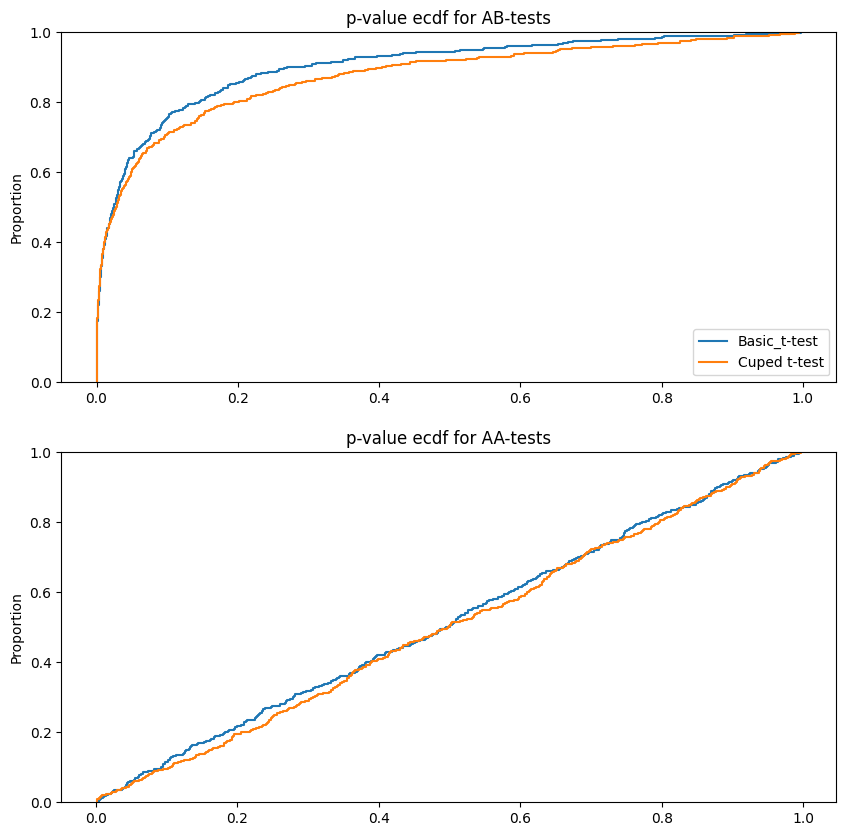

In [353]:
# PLOT
fig, axes = plt.subplots(2, figsize=(10,10))
sns.ecdfplot(ax=axes[0], data = basic_pval_list_AB, label = 'Basic_t-test')
sns.ecdfplot(ax=axes[0], data = np.array(cuped_pval_list_AB), label = 'Cuped t-test')
axes[0].set_title('p-value ecdf for AB-tests')
axes[0].legend(loc='lower right')

sns.ecdfplot(ax=axes[1], data = basic_pval_list_AA)
sns.ecdfplot(ax=axes[1], data = np.array(cuped_pval_list_AA))

axes[1].set_title('p-value ecdf for AA-tests')